#  Reduced Events Table

__Description__: Reduced excess rainfall is calculated for each event using a user-specified stormwater removal rate and capacity.

__Input__: A JSON file containing the incremental excess rainfall for a suite of events which may have different durations and boundary condition names, and the stormwater removal rate and capacity. 

__Output__: 

- The incremental reduced excess rainfall for each event as a JSON.

- The incremental stormwater amount for each event as a JSON.

- A metadata file containing the stormwater removal rate, the stormwater capacity, and the seed of the random number generator.

---

## A. Load Libraries, Parameters, and Data:

### Libraries:

In [1]:
import sys
sys.path.append('core')
import hydromet_reduced
from hydromet import*

### Parameters: 

#### Papermill (site specific):

##### Convert all paths to objects:

In [3]:
outputs_dir = pl.Path(outputs_dir)

##### Set the base filename for reading/writing files:

In [4]:
if distal:
    filename = 'distal_{0}_{1}.json'.format(AOI, Model)
else:
    filename = '{0}_{1}.json'.format(AOI, Model)

### Load the excess rainfall data:

In [5]:
with open(outputs_dir/filename) as f:
    EventsTable = json.load(f)

##### Extract the durations:

In [6]:
durations = list(EventsTable.keys())
print('Durations:', durations)

Durations: ['H06', 'H12', 'H24', 'H96']


##### Extract the boundary condition names:

In [7]:
BCN = list(EventsTable[durations[0]]['BCName'].keys())
print('Boundary Condition Names:', BCN)

Boundary Condition Names: ['D01']


---

## B. Calculate Reduced Excess Rainfall:

In [8]:
if rand_rate_cap:
    ReducedTable, StormwaterTable, SW_variables = hydromet_reduced.main(EventsTable, durations, BCN, rand_rate_cap, 
                                                                        minrate = minrate, maxrate = maxrate, seed = seed, display_print = display_print)
else:
    ReducedTable, StormwaterTable, SW_variables = hydromet_reduced.main(EventsTable, durations, BCN, rate = rate,
                                                                        maxcap = maxcap, display_print = display_print)

Duration: H06
Time Step: 0.5 Hours
Rate: 0.0459 Maximum Capacity: 2.2032
Duration: H12
Time Step: 1.0 Hours
Rate: 0.0918 Maximum Capacity: 2.2032
Duration: H24
Time Step: 2.0 Hours
Rate: 0.1836 Maximum Capacity: 2.2032
Duration: H96
Time Step: 4.0 Hours
Rate: 0.3672 Maximum Capacity: 2.2032


---

## C. Plot the Results:

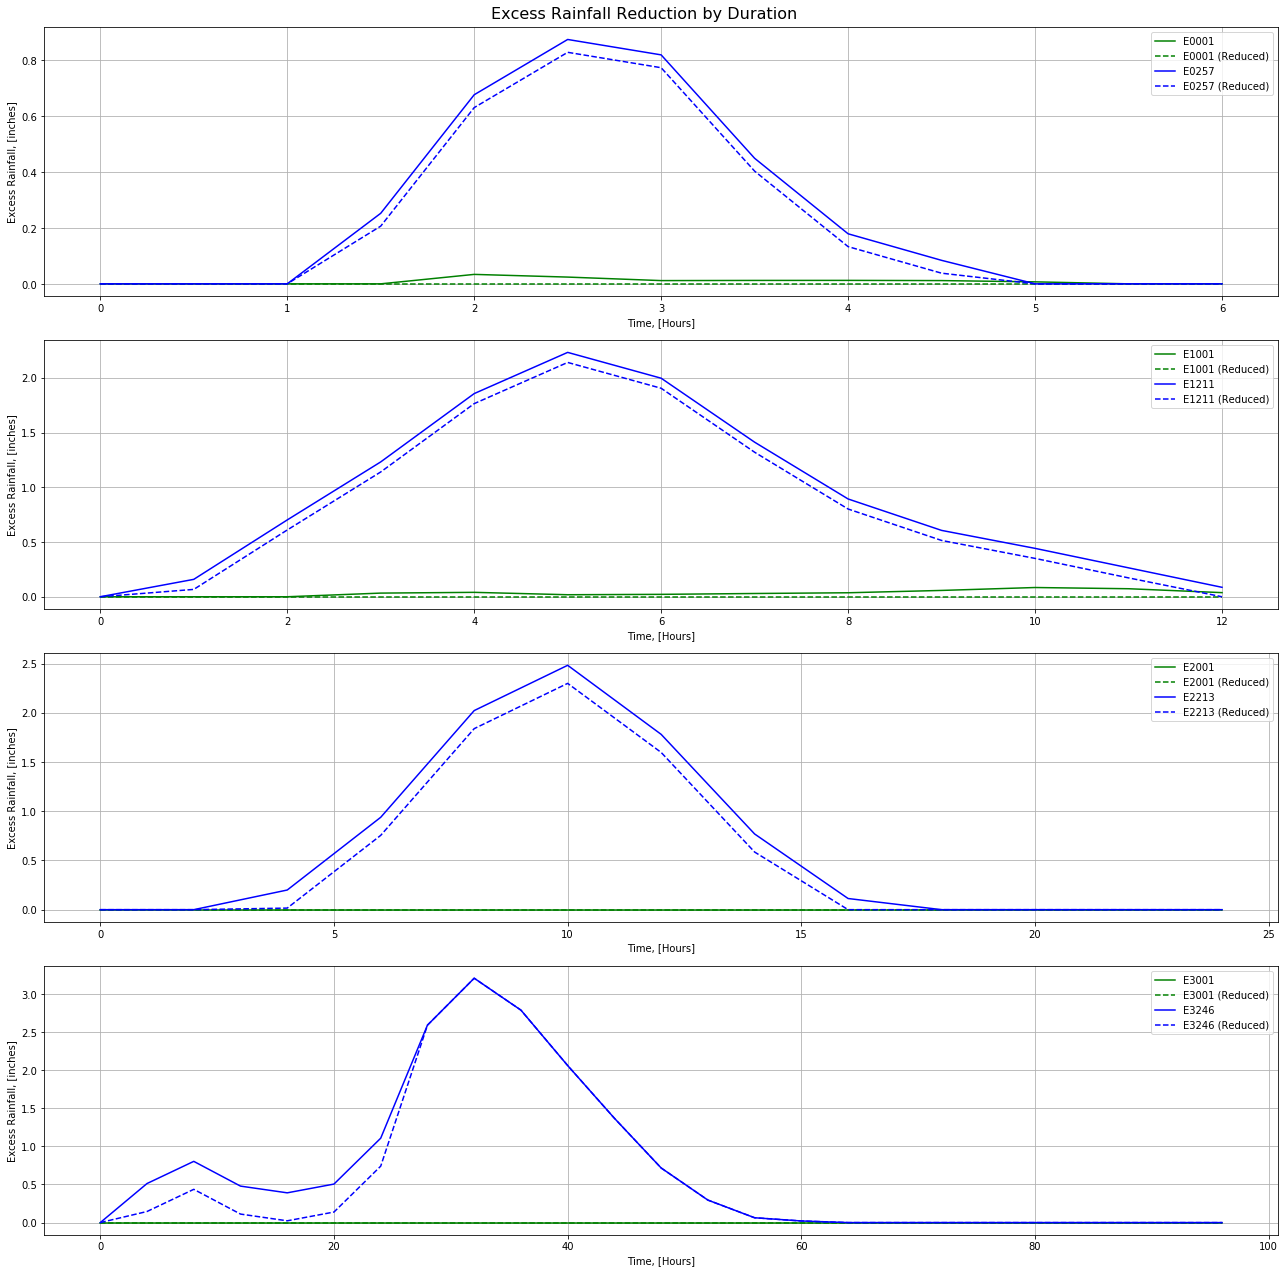

In [9]:
if display_plots: plot_reduced_excess(ReducedTable, EventsTable, durations, BCN[0])

---

## D. Save the Results:

### Unreduced excess rainfall:

In [10]:
with open(outputs_dir/'Unreduced_{0}'.format(filename), 'w') as f:
    json.dump(EventsTable, f)

### Reduced excess rainfall:

In [11]:
with open(outputs_dir/filename, 'w') as f:
    json.dump(ReducedTable, f)

### Stormwater:

In [12]:
with open(outputs_dir/'Stormwater_{0}'.format(filename), 'w') as f:
    json.dump(StormwaterTable, f)

### Metadata:

In [13]:
with open(outputs_dir/'SWMetadata_{0}'.format(filename), 'w') as f:
    json.dump(SW_variables, f)

---

## END